Example of a 'funnel' distribution using the 'agegapry' hazard
==============================================================

This notebook illustrates how the importance of the preferred age difference can be
made age dependent in the `agegapry` hazard. This property allows you to create
a distribution of the formed relationships that has a funnel-like shape.

In [1]:
# First, we'll load some modules that we're going to need
%matplotlib inline
import pysimpactcyan
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create an instance of the PySimpactCyan class, which we can then use to run simulations
simpact = pysimpactcyan.PySimpactCyan()

Setting data directory to /usr/local/share/simpact-cyan/


In [3]:
# This is a helper function that runs a simulation, analyzes the generated data
# and creates a plot from it: a point in the figure indicates a relationship,
# the X-axis is the age of the man when the relationship was formed and the Y-axis
# is the relationship of the woman

def showAges(cfg, path="/tmp/simptest", seed=-1):
    ret = simpact.run(cfg, path, seed=seed)
    rel = pd.read_csv(ret["logrelations"])
    ppl = pd.read_csv(ret["logpersons"])
    numRel = rel.shape[0]

    agesMen = []
    agesWomen = []
    for r in range(numRel):
        idm = rel.iloc[r]["ID1"]
        idw = rel.iloc[r]["ID2"]
        t = rel.iloc[r]["FormTime"]
        tobm = float(ppl[ppl["ID"] == idm]["TOB"])
        tobw = float(ppl[ppl["ID"] == idw]["TOB"])
        agesMen.append(t-tobm)
        agesWomen.append(t-tobw)

    plt.figure(1, figsize=(6,6), dpi=80)
    plt.gca().set_aspect('equal')
    plt.xlabel("Age man")
    plt.ylabel("Age woman")
    plt.plot(agesMen, agesWomen, 'o')
    plt.plot([0,100],[0,100])

Using identifier 'simpact-cyan-2016-08-11-08-37-46_29863_Wg3CD9lP-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 1053946534
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0testing4
# Current simulation time is 15.0116
# Number of events executed is 3140
# Started with 200 people, ending with 185 (difference is -15)


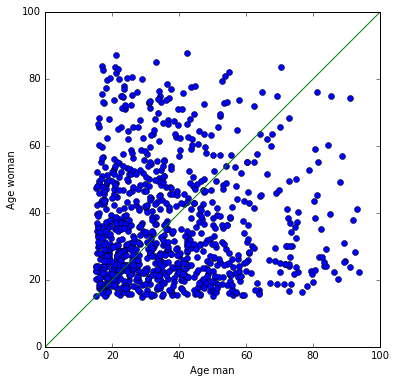

In [4]:
# First, we'll run a simulation with all the default settings. This uses
# the 'simple' formation hazard with settings that do not specify any 
# particular age difference.
showAges(None);

Using identifier 'simpact-cyan-2016-08-11-08-38-22_29863_qx84Kb8t-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 363828277
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0testing4
# Current simulation time is 50.0072
# Number of events executed is 8172
# Started with 800 people, ending with 240 (difference is -560)


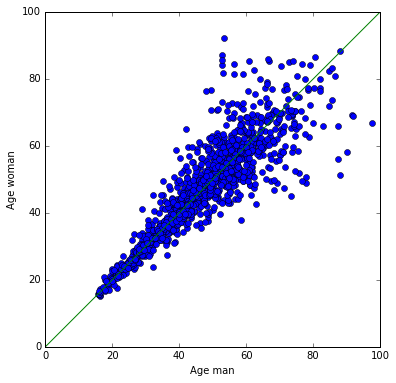

In [5]:
# In the following example, we're going to use the 'agegapry' hazard. To be able to
# use this, we also need to specify that the reference year is synchronized periodically.
# By default, the 'agegapry' hazard expects that this sync is performed at least yearly
# (the default value of 'formation.hazard.agegapry.maxageref.diff' is 1), so we'll set
# 'syncrefyear.interval' to 1 as well.
#
# In the hazard, we're not going to change the slope of the resulting distribution, but
# we're going to set the parameters that make the importance of the age gap term dependent
# on the age of the person. This way, we get a funnel-like shape of the distribution.

cfg = {}
cfg["population.simtime"] = 50
cfg["population.nummen"] = 400
cfg["population.numwomen"] = 400
cfg["syncrefyear.interval"] = 1
cfg["formation.hazard.type"] = "agegapry"
cfg["formation.hazard.agegapry.baseline"] = 0.1
cfg["formation.hazard.agegapry.gap_factor_man_const"] = 0
cfg["formation.hazard.agegapry.gap_factor_man_exp"] = -0.7
cfg["formation.hazard.agegapry.gap_factor_man_age"] = -0.06
cfg["formation.hazard.agegapry.gap_factor_woman_const"] = 0
cfg["formation.hazard.agegapry.gap_factor_woman_exp"] = -0.7
cfg["formation.hazard.agegapry.gap_factor_woman_age"] = -0.06
showAges(cfg);

Using identifier 'simpact-cyan-2016-08-11-08-38-51_29863_JGImAu9W-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 1081041240
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0testing4
# Current simulation time is 50.0205
# Number of events executed is 9727
# Started with 800 people, ending with 306 (difference is -494)


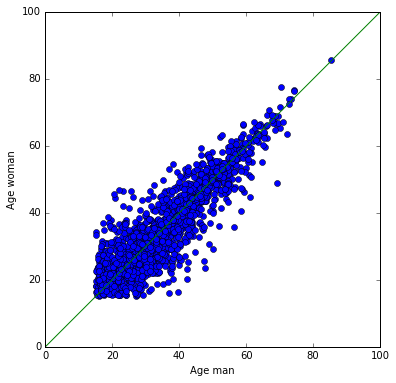

In [6]:
# This is a simular example as before, but instead of getting less picky as they
# age, in this simulation people will put more importance in the age difference
# as they get older.

cfg = {}
cfg["population.simtime"] = 50
cfg["population.nummen"] = 400
cfg["population.numwomen"] = 400
cfg["syncrefyear.interval"] = 1
cfg["formation.hazard.type"] = "agegapry"
cfg["formation.hazard.agegapry.baseline"] = 0.1
cfg["formation.hazard.agegapry.gap_factor_man_const"] = 0
cfg["formation.hazard.agegapry.gap_factor_man_exp"] = -0.05
cfg["formation.hazard.agegapry.gap_factor_man_age"] = 0.03
cfg["formation.hazard.agegapry.gap_factor_woman_const"] = 0
cfg["formation.hazard.agegapry.gap_factor_woman_exp"] = -0.05
cfg["formation.hazard.agegapry.gap_factor_woman_age"] = 0.03
showAges(cfg);